In [1]:
from fastai.vision import *

In [2]:
path = './data'

In [26]:
np.random.seed(42)
data = ImageDataBunch.from_csv(path, folder="train", suffix='.jpg', valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

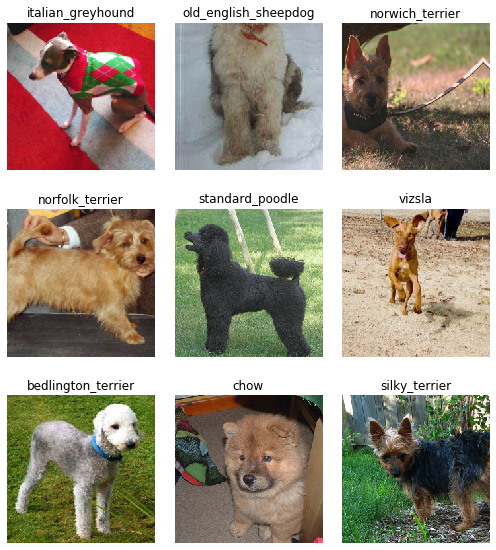

In [29]:
data.show_batch(rows=3, figsize=(7,8))

In [30]:
len(data.classes), data.c, len(data.train_ds), len(data.valid_ds)

(120, 120, 8178, 2044)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

NameError: name 'data' is not defined

In [32]:
learn.fit_one_cycle(4)

In [33]:
learn.save('stage-1')

In [34]:
learn.unfreeze()

In [35]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


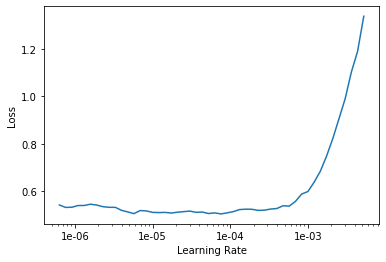

In [36]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(2, max_lr=slice(1e-4,1e-3))

In [38]:
learn.save('stage-2')

In [39]:
learn.fit_one_cycle(4, max_lr=slice(1e-4,1e-3))

In [40]:
learn.save('stage-3')

# Resnet-50

In [48]:
data50 = ImageDataBunch.from_csv(path, folder="train", suffix='.jpg', valid_pct=0.2, ds_tfms=get_transforms(), size=100,num_workers=4).normalize(imagenet_stats)

In [49]:
learn50 = cnn_learner(data50, models.resnet50, metrics=error_rate)

In [50]:
learn50.fit_one_cycle(4)

In [51]:
learn50.save('stage50-1')

In [52]:
learn50.unfreeze()

In [53]:
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


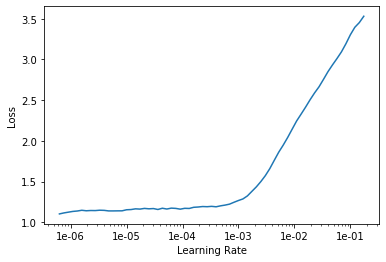

In [54]:
learn50.recorder.plot()

In [55]:
learn50.fit_one_cycle(10, max_lr=slice(1e-4,4e-4))

In [56]:
learn50.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

In [57]:
learn50.fit_one_cycle(10, max_lr=slice(1e-5,2e-4))

In [58]:
learn50.save('stage50-2')

In [61]:
interp50 = ClassificationInterpretation.from_learner(learn50)
interp = ClassificationInterpretation.from_learner(learn)


In [67]:
interp.most_confused()

[('scottish_deerhound', 'irish_wolfhound', 8),
 ('eskimo_dog', 'siberian_husky', 7),
 ('lakeland_terrier', 'wire-haired_fox_terrier', 7),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 6),
 ('malamute', 'siberian_husky', 6),
 ('standard_poodle', 'miniature_poodle', 6),
 ('australian_terrier', 'silky_terrier', 5),
 ('pembroke', 'cardigan', 5),
 ('silky_terrier', 'australian_terrier', 5),
 ('staffordshire_bullterrier', 'american_staffordshire_terrier', 5),
 ('yorkshire_terrier', 'silky_terrier', 5),
 ('german_short-haired_pointer', 'bluetick', 4),
 ('ibizan_hound', 'whippet', 4),
 ('lhasa', 'shih-tzu', 4),
 ('lhasa', 'tibetan_terrier', 4),
 ('miniature_poodle', 'standard_poodle', 4),
 ('miniature_poodle', 'toy_poodle', 4),
 ('walker_hound', 'english_foxhound', 4),
 ('airedale', 'irish_terrier', 3),
 ('airedale', 'lakeland_terrier', 3),
 ('appenzeller', 'entlebucher', 3),
 ('appenzeller', 'greater_swiss_mountain_dog', 3),
 ('bedlington_terrier', 'lakeland_terrier', 3),
 

In [68]:
interp50.most_confused()

[('lhasa', 'shih-tzu', 8),
 ('english_foxhound', 'walker_hound', 7),
 ('siberian_husky', 'eskimo_dog', 7),
 ('collie', 'border_collie', 6),
 ('silky_terrier', 'yorkshire_terrier', 6),
 ('toy_poodle', 'miniature_poodle', 6),
 ('walker_hound', 'english_foxhound', 6),
 ('standard_schnauzer', 'miniature_schnauzer', 5),
 ('american_staffordshire_terrier', 'staffordshire_bullterrier', 4),
 ('bouvier_des_flandres', 'giant_schnauzer', 4),
 ('miniature_poodle', 'standard_poodle', 4),
 ('miniature_poodle', 'toy_poodle', 4),
 ('rhodesian_ridgeback', 'redbone', 4),
 ('shetland_sheepdog', 'collie', 4),
 ('silky_terrier', 'australian_terrier', 4),
 ('whippet', 'italian_greyhound', 4),
 ('australian_terrier', 'yorkshire_terrier', 3),
 ('beagle', 'walker_hound', 3),
 ('boxer', 'bull_mastiff', 3),
 ('brittany_spaniel', 'welsh_springer_spaniel', 3),
 ('french_bulldog', 'boston_bull', 3),
 ('german_short-haired_pointer', 'weimaraner', 3),
 ('great_pyrenees', 'kuvasz', 3),
 ('greater_swiss_mountain_dog', 

In [70]:
learn50.export('export50')

In [71]:
learn.export('export34')

In [3]:
defaults.device = torch.device('cpu')

In [4]:
learn = load_learner(path,file='export34')

E:\Programs\Miniconda\envs\fastai\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
E:\Programs\Miniconda\envs\fastai\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
E:\Programs\Miniconda\envs\fastai\lib\site-packages\torch\serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by a

In [5]:
img = open_image(path+'/../german_shepherd.jpg')
img2 = open_image(path+'/../dachshund-u3.jpg')
img3 = open_image(path+'/../doberman-pinscher-i1.jpg')

In [19]:
y,pred,raw = learn.predict(img3)
y,pred,raw

(Category doberman,
 tensor(38),
 tensor([4.1006e-09, 5.4419e-08, 1.7246e-10, 4.7890e-08, 2.0658e-08, 5.7005e-07,
         1.1514e-08, 1.3027e-07, 5.3843e-08, 7.1467e-10, 7.8367e-08, 2.0160e-09,
         4.8209e-03, 5.1464e-10, 1.2794e-06, 1.5304e-08, 4.2612e-11, 4.1686e-11,
         8.4234e-10, 6.0902e-09, 4.6842e-10, 6.7909e-09, 2.4108e-09, 2.2999e-09,
         1.1559e-11, 4.6747e-09, 2.6712e-10, 5.1538e-11, 3.5197e-09, 2.1825e-08,
         2.8072e-09, 2.2240e-10, 1.2156e-10, 4.5781e-11, 1.4209e-09, 5.5054e-11,
         1.0303e-10, 1.5104e-09, 9.9502e-01, 2.8925e-09, 1.3121e-09, 2.5987e-10,
         1.8693e-07, 4.2552e-10, 3.8873e-08, 6.2243e-10, 3.2383e-08, 6.5336e-09,
         7.8941e-09, 9.0578e-11, 2.3912e-06, 5.3515e-06, 1.3813e-08, 2.3827e-06,
         6.5946e-08, 9.1833e-07, 1.5864e-08, 1.9582e-09, 1.0330e-09, 2.2369e-09,
         6.3238e-07, 7.2549e-11, 8.9795e-10, 7.1736e-08, 1.9326e-09, 2.7681e-09,
         8.5648e-10, 6.3558e-08, 3.2039e-10, 1.3106e-09, 2.0528e-10, 2.2778e

In [40]:
top_class_indexes = list(np.argsort(raw)[-3:].numpy())

In [48]:
 [(learn.data.classes[i], round(raw[i].item()*100,2)) for i in top_class_indexes] 

[('miniature_pinscher', 0.01),
 ('black-and-tan_coonhound', 0.48),
 ('doberman', 99.5)]

In [80]:
learn50.predict(img)

(Category german_shepherd,
 tensor(46),
 tensor([1.7821e-07, 2.3480e-06, 5.6140e-05, 7.7012e-04, 1.6213e-05, 2.6767e-05,
         7.5198e-06, 2.0289e-06, 2.7373e-06, 1.1009e-05, 1.0420e-06, 1.0179e-05,
         6.8748e-05, 1.0282e-06, 1.9131e-04, 2.0973e-04, 1.2517e-05, 1.1266e-04,
         1.3098e-05, 8.7915e-06, 4.0400e-06, 2.0818e-06, 2.2811e-05, 1.8195e-06,
         2.1220e-05, 6.8974e-06, 1.4585e-06, 3.6551e-05, 1.6510e-04, 4.7785e-06,
         1.5113e-06, 1.9172e-05, 4.2513e-06, 1.6442e-05, 1.3491e-05, 6.7931e-07,
         1.4562e-04, 1.0308e-03, 2.7708e-04, 1.1545e-05, 1.9405e-06, 3.0259e-06,
         1.0879e-06, 1.2373e-04, 5.1826e-06, 2.6713e-05, 8.3999e-01, 2.4036e-06,
         5.7519e-06, 1.7055e-04, 2.0259e-05, 2.7910e-06, 2.4831e-06, 8.5880e-06,
         2.9127e-04, 5.0277e-06, 5.1104e-05, 4.4058e-06, 2.1525e-06, 1.6135e-05,
         5.2222e-07, 8.4569e-07, 1.1569e-05, 1.5340e-01, 7.9692e-07, 2.1034e-06,
         7.3337e-05, 4.4859e-06, 5.7205e-05, 2.5815e-04, 9.9057e-07, 

In [81]:
data

ImageDataBunch;

Train: LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dingo,pekinese,golden_retriever,bedlington_terrier,bedlington_terrier
Path: data;

Valid: LabelList (2044 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
toy_terrier,irish_setter,scottish_deerhound,english_setter,great_pyrenees
Path: data;

Test: None

In [82]:
data.train_ds

LabelList (8178 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dingo,pekinese,golden_retriever,bedlington_terrier,bedlington_terrier
Path: data

In [94]:
 data.train_dl.y[1]

Category pekinese

In [96]:
df = pd.read_csv(path+'/labels.csv')

In [99]:
df[df['breed'].isin(['german_shepherd'])]['id']+'.jpg'


60      016bcdb05e2d0e0878877df21b8c3cff.jpg
68      01b09bdac592b0eb9909dd105314ad3a.jpg
243     05a05cf4c8d6a4f3f780a9112a11999b.jpg
454     0ac12e1849fd51b2158d16b8f5e75551.jpg
774     1321d074e879267699d42fdca77b4004.jpg
1020    1934100d2a8d871ab7abd9761f62486f.jpg
1097    1b3d33d04536d3c05d3827d5c9237c15.jpg
1194    1dbb5ed33712d605d15f2a4e5dc855c6.jpg
1473    249d04652c43e370746078f0aacfbfce.jpg
1943    2fdb41ae313a153f50d7d8b48006b98d.jpg
2198    372d8fc70a43192932945e1431c1ba9b.jpg
2299    395fb3d2990275545cc6782d9c89b3ba.jpg
2413    3c1d462488d6c09476308492899debc9.jpg
2589    404a7f3fe4c6d7c77a2e1ee19e506aec.jpg
2762    43eb1e0b1a6baaa87cc70d4e21d99389.jpg
2857    466d16819add5c3d7258842e71c97537.jpg
2991    49f0ef56406121db3ec89e2efa83aa03.jpg
3043    4b30249d3baaf6a00a0345ac07f01d30.jpg
3077    4bd83d80fbab26a3a1f0d73785cf7af6.jpg
3233    502ef062af76eacc4ecd8fa38864d228.jpg
3368    538921b32a385b9e4cd5ce4dbb0ba462.jpg
3532    57f3f8f2f462cf337587d0a471dfc73a.jpg
3553    58